#### **4.2.1 Decision Trees**

A decision tree is a model that recursively splits the data into more homogeneous groups based on feature values. This method is intuitive for campaign managers since they often segment clients by age, job type, and other similar factors.

**Mathematical Structure**: The objective of the decision tree algorithm is to create branches based on features that best separate the binary outcome (subscribed or not).

The data consists of predictors $ X = (X_1, X_2, \dots, X_k) $ and a binary outcome $ Y \in \{0, 1\} $. 

The algorithm aims to find the best split at each node by minimizing impurity. Common impurity measures are:

1. **Gini impurity**:
    $$
    G(t) = 2p_t(1 - p_t)
    $$
2. **Entropy (Information Gain)**:
    $$
    H(t) = -p_t \log(p_t) - (1 - p_t) \log(1 - p_t)
    $$

Where $ p_t $ represents the proportion of positive outcomes at node $ t $.

At each node, we evaluate the **impurity reduction** when we split the data based on a feature:
$$
\Delta I = I(t) - \frac{n_L}{n_t} I(L) - \frac{n_R}{n_t} I(R)
$$
Where:
- $ n_t $ is the number of samples at node $ t $,
- $ n_L $ and $ n_R $ are the sample sizes of the left and right child nodes, respectively.

**Interpretation**: A decision tree creates rules to segment customers and predict the likelihood of response. For example, it might create a rule:
* If previous contact = yes and duration > 300 seconds, then $ P(y=1) = 0.42 $.

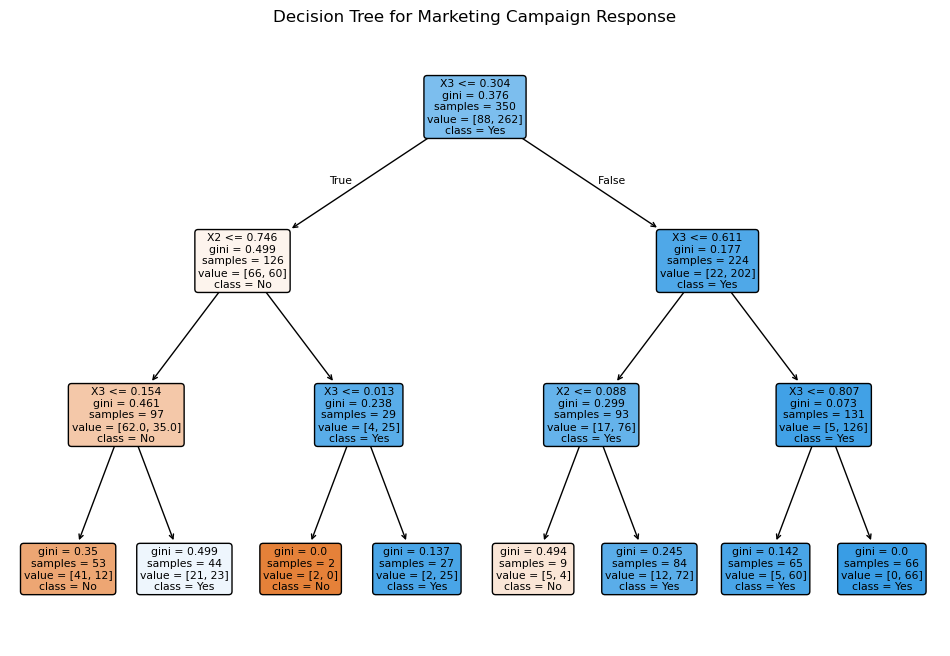

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Simulating data
np.random.seed(42)
X = np.random.rand(500, 3)  # 3 predictors
y = (X[:, 0] + X[:, 1] * 2 + X[:, 2] * 3 + np.random.randn(500) > 2).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train decision tree model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=["X1", "X2", "X3"], class_names=["No", "Yes"], rounded=True)
plt.title("Decision Tree for Marketing Campaign Response")
plt.show()

#### **4.2.2 Random Forests**

A single decision tree is simple but can be unstable. Small changes in data can lead to different splits, resulting in a highly variable model. Random Forests solve this by averaging multiple decision trees built on different random samples of the data, making the model more stable.

**Concept**: A Random Forest is an ensemble of \( B \) decision trees:
$$
\hat{f}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}_b(x)
$$
Where each $ \hat{f}_b $ is a tree built on a bootstrap sample (random sampling with replacement).

The final prediction is the majority vote for classification:
$$
\hat{y} = \text{mode} \{ \hat{y}_1, \hat{y}_2, \dots, \hat{y}_B \}
$$
And for probability estimation, it's the average of the predicted probabilities.

**Randomness** in Random Forests comes from:
1. **Bootstrap Sampling (Bagging)**: Each tree is trained on a random subset of the data, with the remaining data used for validation (out-of-bag).
2. **Random Feature Subsets**: At each split, a random subset of features is selected to prevent any single variable from dominating.

**Bias–Variance Tradeoff**:
- Single trees have low bias and high variance.
- Random Forests reduce variance without increasing bias, improving stability.

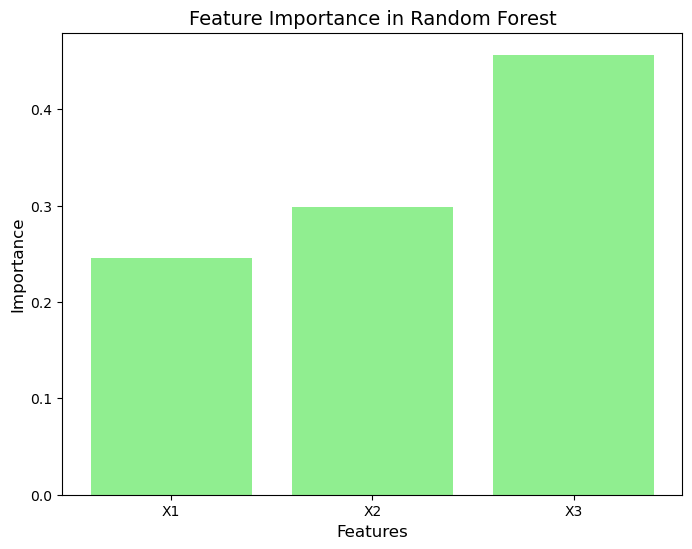

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar([f'X{i+1}' for i in range(X.shape[1])], importance, color='lightgreen')
plt.title('Feature Importance in Random Forest', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

#### **4.2.3 Gradient Boosting and XGBoost**

Gradient Boosting builds trees sequentially, each correcting the errors of the previous one. This turns weak learners into a strong ensemble.

**Concept**: The algorithm builds an additive function:
$$
\hat{f}(x) = \sum_{m=1}^M \nu h_m(x)
$$
Where each $ h_m(x) $ is a shallow tree (weak learner), and $ \nu $ is the learning rate.

Boosting proceeds as follows:
1. Start with an initial prediction.
2. Compute the residuals (errors from previous trees).
3. Fit a new tree to the residuals.
4. Add the new tree's output, weighted by $ \nu $, to the model.
5. Repeat until convergence.

**XGBoost** improves traditional gradient boosting by adding regularization and optimizing with second-order gradients.

**Intuition**: Boosting corrects for errors iteratively. It focuses on the mistakes made by the previous models, thus refining the model over time.

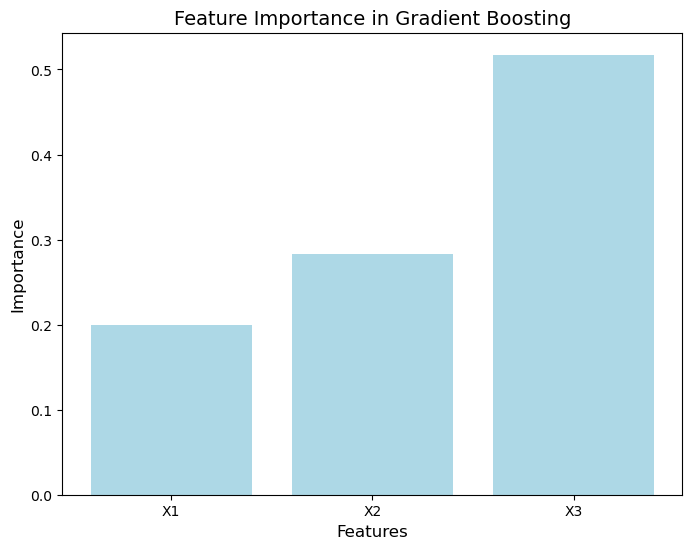

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train gradient boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Feature importance
gb_importance = gb.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar([f'X{i+1}' for i in range(X.shape[1])], gb_importance, color='lightblue')
plt.title('Feature Importance in Gradient Boosting', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

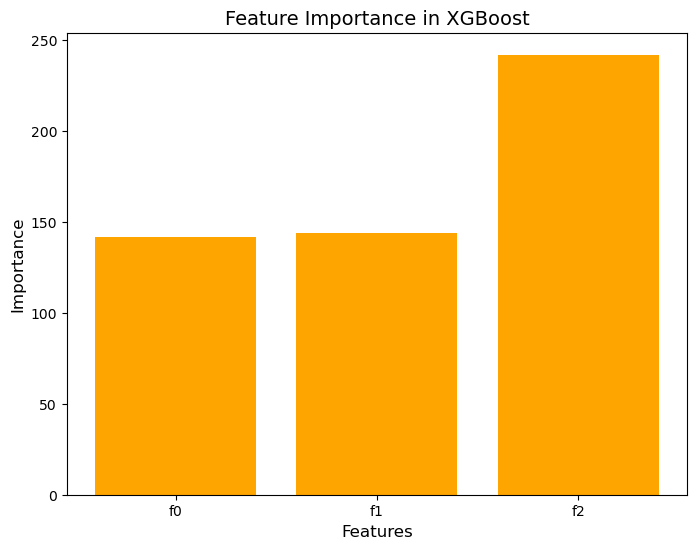

In [6]:
import xgboost as xgb

# Prepare data for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train the model
xg_model = xgb.train(params, dtrain, num_boost_round=100)

# Feature importance in XGBoost
xg_importance = xg_model.get_fscore()

# Plot feature importance for XGBoost
plt.figure(figsize=(8, 6))
plt.bar(xg_importance.keys(), xg_importance.values(), color='orange')
plt.title('Feature Importance in XGBoost', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

#### **4.2.4 Model Comparison and Practical Guidelines**

Each modeling technique has its advantages. The choice of model depends on the campaign's goals.

1. **Model Structure and Interpretability**:
   - Logistic regression gives clear cause-and-effect reasoning.
   - Decision Trees segment customers intuitively.
   - Random Forests and Boosting improve predictive power, but are less interpretable.

2. **Statistical Behavior**:
   - Logistic regression has high bias but low variance.
   - Single Trees have low bias but high variance.
   - Random Forests reduce variance, and Boosting reduces bias.

3. **Marketing Perspective**:
   - In marketing campaigns, interpretability is crucial. Transparent models often deliver greater business value.

4. **Practical Guidelines**:
   - **Start Simple**: Fit a logistic regression model first.
   - **Explore Nonlinearity**: Add trees or boosting to capture segment-specific patterns.
   - **Validate**: Always validate with cross-validation or out-of-sample data.
   - **Regularize and Prune**: Apply regularization to avoid overfitting.
   - **Interpret Before Action**: Use partial dependence and feature importance to link model logic to customer behavior.